In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
data, label_true = load_data('gaussian2d') # iris  'iris')#
pca_painter = PaintPCA(data)
feat_num = data.shape[1]

No PCA performed


figure saved at _simcache/2022-05-05_15-55-00_cat-2choices_var_rho60[1651762500242523]


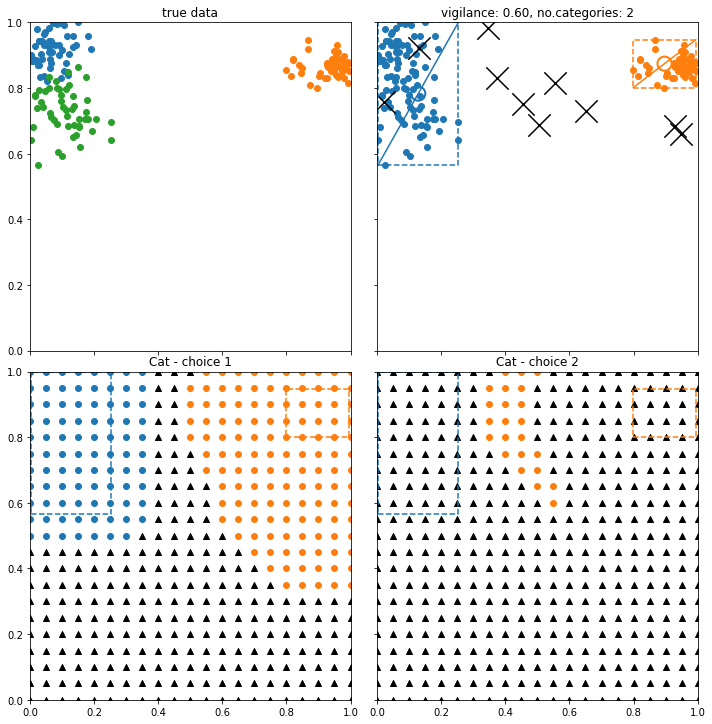

In [3]:
no_rho = 11
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(2, 2,
                        figsize = (10, 10), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0,0], label_true)
axs[0,0].set_title("true data")
axs[0,0].set_xlim(0, 1)
axs[0,0].set_ylim(0, 1)


# init
rho=0.6
net = FuzzyART(feat_num, alpha=0.9, rho=rho, best_match_num=2)

# train
net.train(data, epochs=100) # each epoch, all data is shuffled
label_pred = net.test(data)[:, 0].astype(int)

# plot
# pred
pca_painter.scatter(axs[0,1], label_pred, data)

# bipole and centre
pca_painter.tripole(axs[0,1], *net.getcat_bipole())

# boundary    
axs[0,1].set_prop_cycle(None)
[pca_painter.boundary(a, net.getcat_vertex()) for a in (axs[0,1], axs[1,0], axs[1,1])]

# 2d meshgrid
grid_x = np.linspace(0, 1, 21)
grid_y = np.linspace(0, 1, 21)
grid_xy = np.reshape(np.meshgrid(grid_x, grid_y), (2, -1)).T
for idx in range(2):
    label_grid = net.test(grid_xy).astype(int)[:, idx]
    pca_painter.scatter(axs[1,idx], label_grid, grid_xy)    
    axs[1,idx].set_title('Cat - choice {}'.format(idx+1))

# info
cat_number = net.w.shape[0]
axs[0,1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))

cat_replay = net.replay_null(10, 0)[0].T
axs[0,1].scatter(*cat_replay, marker='x', s=500, c='k')

# save fig
simname = 'cat-2choices_var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
savefigure_datetime(fig, simname, dirname)
    

In [4]:
rr = net.replay_1cat((0,1), 10, 0, 'vertex')
rr

(array([[0.79922839, 0.94698339],
        [0.00267124, 0.99989506],
        [0.99414122, 0.94698339],
        [0.99414122, 0.80169421],
        [0.79922839, 0.80169421],
        [0.25298481, 0.99989506],
        [0.25298481, 0.56629264],
        [0.00267124, 0.56629264]]),
 array([1, 0, 1, 1, 1, 0, 0, 0]))

In [5]:
least_l1_to_data(rr[0], data)

array([0.06926798, 0.04046548, 0.05160265, 0.0152199 , 0.04946077,
       0.10342569, 0.07476561, 0.02229225])

In [6]:
r0 = net.replay_null(10, 0)
r0

(array([[0.63628143, 0.93901878],
        [0.1351725 , 0.72997081],
        [0.16954547, 0.90637688],
        [0.38433007, 0.93206333],
        [0.01671541, 0.84195139],
        [0.6614051 , 0.6721804 ],
        [0.35640564, 0.62970769],
        [0.99133532, 0.71392339],
        [0.01965198, 0.65133106],
        [0.33779822, 0.62333859]]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]))

In [7]:
least_l1_to_data(r0[0], data)

array([0.2346787 , 0.01088099, 0.03301507, 0.20745599, 0.02088645,
       0.31679787, 0.11477139, 0.10243709, 0.02652288, 0.10253306])